Loaded 46984984 samples from CIR_40.dat


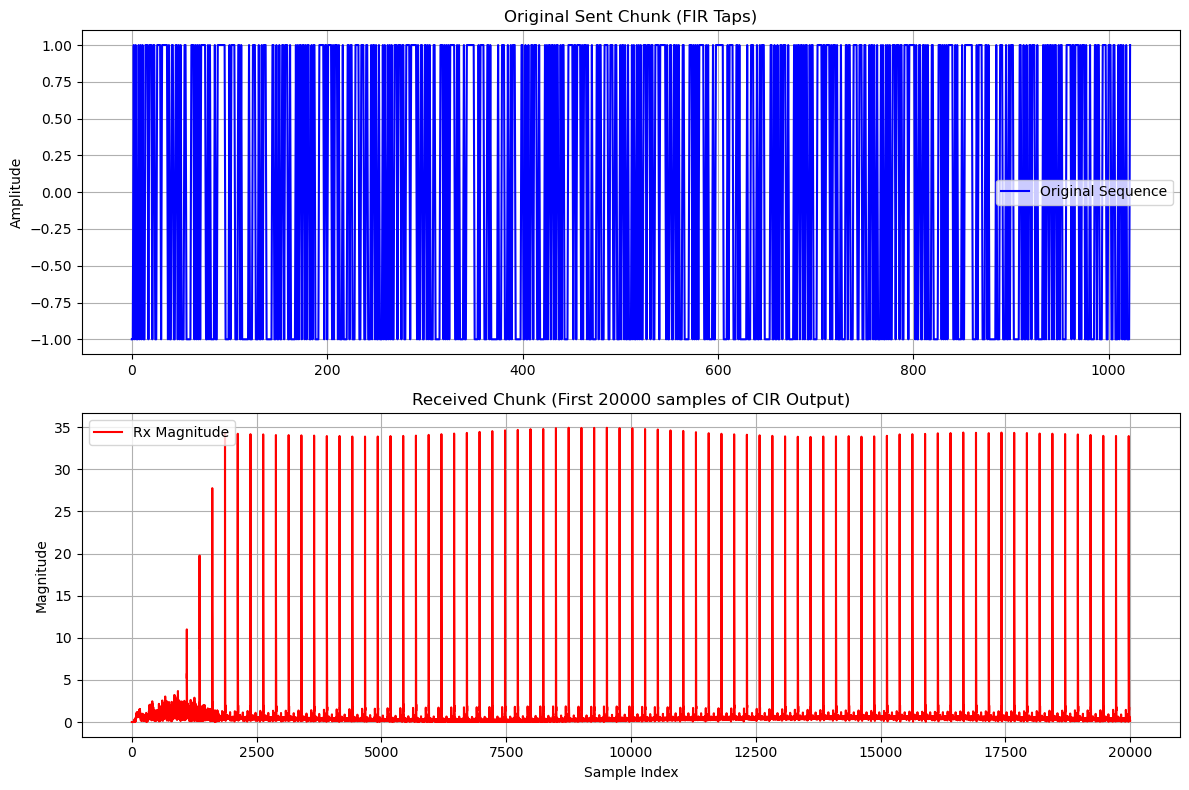

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the Received Data
filename = 'CIR_40.dat'

try:
    # GNU Radio complex files are standard complex64 (float32 real, float32 imag)
    rx_data = np.fromfile(filename, dtype=np.complex64)
    print(f"Loaded {len(rx_data)} samples from {filename}")
except FileNotFoundError:
    print(f"Error: Could not find {filename}. Make sure it is in the same directory.")
    exit()

# 2. Define the Original Sequence
# (Copied exactly from your Rx FIR Filter taps)
original_sent = np.array([-1,-1,1,-1,1,-1,-1,1,-1,1,-1,1,-1,-1,1,1,1,-1,1,1,1,-1,1,1,-1,-1,1,1,1,1,-1,1,1,1,1,1,1,-1,1,-1,-1,1,1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,1,-1,1,-1,1,-1,1,1,1,1,1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,-1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,1,-1,1,1,1,1,-1,-1,-1,1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,1,1,-1,-1,-1,1,-1,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,1,-1,-1,1,1,-1,1,1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,1,1,-1,1,-1,1,1,-1,-1,1,-1,1,1,-1,-1,-1,-1,1,1,1,1,1,-1,1,1,-1,1,1,1,1,-1,1,-1,1,1,1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,1,1,-1,-1,-1,1,1,1,1,-1,-1,1,1,1,-1,-1,1,1,-1,-1,-1,1,-1,1,1,-1,1,-1,-1,1,-1,-1,-1,1,-1,1,-1,-1,1,-1,1,-1,1,-1,-1,1,1,1,-1,1,1,1,-1,1,1,-1,-1,1,1,1,1,-1,1,1,1,1,1,1,-1,1,-1,-1,1,1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,1,-1,1,-1,1,-1,1,1,1,1,1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,-1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,1,-1,1,1,1,1,-1,-1,-1,1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,1,1,-1,-1,-1,1,-1,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,1,-1,-1,1,1,-1,1,1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,1,1,-1,1,-1,1,1,-1,-1,1,-1,1,1,-1,-1,-1,-1,1,1,1,1,1,-1,1,1,-1,1,1,1,1,-1,1,-1,1,1,1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,1,1,-1,-1,-1,1,1,1,1,-1,-1,1,1,1,-1,-1,1,1,-1,-1,-1,1,-1,1,1,-1,1,-1,-1,1,-1,-1,-1,1,-1,1,-1,-1,1,-1,1,-1,1,-1,-1,1,1,1,-1,1,1,1,-1,1,1,-1,-1,1,1,1,1,-1,1,1,1,1,1,1,-1,1,-1,-1,1,1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,1,-1,1,-1,1,-1,1,1,1,1,1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,-1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,1,-1,1,1,1,1,-1,-1,-1,1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,1,1,-1,-1,-1,1,-1,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,1,-1,-1,1,1,-1,1,1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,1,1,-1,1,-1,1,1,-1,-1,1,-1,1,1,-1,-1,-1,-1,1,1,1,1,1,-1,1,1,-1,1,1,1,1,-1,1,-1,1,1,1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,1,1,-1,-1,-1,1,1,1,1,-1,-1,1,1,1,-1,-1,1,1,-1,-1,-1,1,-1,1,1,-1,1,-1,-1,1,-1,-1,-1,1,-1,1,-1,-1,1,-1,1,-1,1,-1,-1,1,1,1,-1,1,1,1,-1,1,1,-1,-1,1,1,1,1,-1,1,1,1,1,1,1,-1,1,-1,-1,1,1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,1,1,1,-1,1,-1,1,-1,1,-1,1,1,1,1,1,-1,-1,1,-1,1,-1,-1,-1,-1,1,-1,-1,1,1,1,1,1,1,1,1,-1,-1,-1,-1,1,-1,1,1,1,1,-1,-1,-1,1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,1,1,-1,-1,-1,1,-1,-1,1,-1,1,1,1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,1,-1,-1,1,-1,-1,1,1,-1,1,1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,1,1,-1,1,-1,1,1,-1,-1,1,-1,1,1,-1,-1,-1,-1,1,1,1,1,1,-1,1,1,-1,1,1,1,1,-1,1,-1,1,1,1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,1,1,-1,1,1,-1,-1,-1,1,1,1,1,-1,-1,1,1,1,-1,-1,1,1,-1,-1,-1,1,-1,1,1,-1,1,-1,-1,1,-1,-1,-1,1])

# 3. Visualization
plt.figure(figsize=(12, 8))

# Plot A: Original Transmitted Sequence (Taps)
plt.subplot(2, 1, 1)
plt.plot(original_sent, color='blue', label='Original Sequence')
plt.title("Original Sent Chunk (FIR Taps)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()

# Plot B: Received Data (Correlation Magnitude)
# We limit the view to the first 2000 samples to see the structure clearly
view_limit = min(20000, len(rx_data))

plt.subplot(2, 1, 2)
# We use np.abs() to see the magnitude of the correlation peaks
plt.plot(np.abs(rx_data[:view_limit]), color='red', label='Rx Magnitude')
plt.title(f"Received Chunk (First {view_limit} samples of CIR Output)")
plt.xlabel("Sample Index")
plt.ylabel("Magnitude")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [1]:
import numpy as np

def analyze_sequence(filename):
    # 1. Read the binary file (GNU Radio float sinks use float32)
    try:
        raw_data = np.fromfile(filename, dtype=np.float32)
        print(f"Read {len(raw_data)} samples from file.")
    except FileNotFoundError:
        print("File not found.")
        return

    # 2. Find the repetition period (Sequence Length)
    # We take the first 20 samples and slide through the array to find where they repeat.
    # 20 is arbitrary; it just needs to be long enough to be a unique pattern.
    pattern_len = 20
    if len(raw_data) < pattern_len * 2:
        print("Error: Not enough data to detect a sequence.")
        return

    pattern = raw_data[:pattern_len]
    seq_len = 0
    
    # Start searching from index 1 to find the next occurrence of the pattern
    for i in range(1, len(raw_data) - pattern_len):
        if np.array_equal(raw_data[i:i+pattern_len], pattern):
            seq_len = i
            break
    
    if seq_len == 0:
        print("Could not detect a repeating sequence (or file is too short).")
        return

    # 3. Extract the unique Chip Code
    chip_code = raw_data[:seq_len]

    # 4. Output Results
    print("-" * 30)
    print(f"Detected Sequence Length: {seq_len}")
    print(f"Expected for Degree 8:    255") # 2^8 - 1
    print("-" * 30)
    print("Unique Chip Code found:")
    print(list(chip_code)) # Printed as list for easy copy-pasting
    print("-" * 30)

# Replace 'tx_out.bin' with your actual filename
if __name__ == "__main__":
    # CHANGE THIS FILENAME to your actual .bin or .dat file
    analyze_sequence('tx.bin')

Read 34799678 samples from file.
------------------------------
Detected Sequence Length: 255
Expected for Degree 8:    255
------------------------------
Unique Chip Code found:
[1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 